In [1]:
import sys
!{sys.executable} -m pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!python.exe -m pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1


In [19]:
import numpy as np
import pandas as pd

# Load data
data=pd.read_csv('Dataset_Wax_Deposit_Flow.csv')

data.head()

,Oil Name,API Gravity,S,A,R,Ap,Oil Temperature,Wall Temperature,Rotation Speed,Wall Shear Stress,Oil Viscosity,Wax Crystal Solubility Coefficient,Temperature Gradient,Wax Deposition Rate
0,OL1,22.4,36.9,37.9,19.4,5.8,42.0,32.0,150.0,3.58,0.21,17.70,579.0,9.14
1,OL2,18.3,32.3,42.2,19.8,5.8,45.0,35.0,150.0,2.72,0.13,6.07,578.8,4.96
2,OL3,22.8,43.6,35.5,14.3,6.6,48.0,38.0,150.0,2.25,0.09,3.47,578.9,5.56
3,OL4,25.6,44.3,38.9,11.6,5.2,51.0,41.0,150.0,1.89,0.07,3.88,576.8,7.89
4,OL5,25.0,45.6,34.2,17.0,3.2,55.0,45.0,150.0,1.51,0.05,5.93,574.3,16.26


In [20]:
df = data.iloc[:, 1:]
display(df)

,API Gravity,S,A,R,Ap,Oil Temperature,Wall Temperature,Rotation Speed,Wall Shear Stress,Oil Viscosity,Wax Crystal Solubility Coefficient,Temperature Gradient,Wax Deposition Rate
0,22.4,36.9,37.9,19.4,5.8,42.0,32.0,150.0,3.58,0.21,17.70,579.0,9.14
1,18.3,32.3,42.2,19.8,5.8,45.0,35.0,150.0,2.72,0.13,6.07,578.8,4.96
2,22.8,43.6,35.5,14.3,6.6,48.0,38.0,150.0,2.25,0.09,3.47,578.9,5.56
3,25.6,44.3,38.9,11.6,5.2,51.0,41.0,150.0,1.89,0.07,3.88,576.8,7.89
4,25.0,45.6,34.2,17.0,3.2,55.0,45.0,150.0,1.51,0.05,5.93,574.3,16.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,16.8,80.0,19.0,1.0,0.0,47.0,32.0,150.0,2.85,0.22,17.70,867.6,10.55
88,18.2,32.0,32.0,17.0,19.0,52.0,32.0,150.0,2.33,0.23,17.70,1152.0,12.25
89,18.3,34.0,31.0,20.0,15.0,50.0,45.0,150.0,1.76,0.05,5.93,288.4,11.33
90,18.8,38.0,29.0,20.0,13.0,60.0,45.0,150.0,1.32,0.05,5.93,859.3,24.22


In [21]:
# Spliting data into Feature and
X=df.iloc[:, 5:-1]
y=df.iloc[:,-1]

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # 70% training and 30% test

In [22]:
display(X_train,X_test, y_train,y_test)

,Oil Temperature,Wall Temperature,Rotation Speed,Wall Shear Stress,Oil Viscosity,Wax Crystal Solubility Coefficient,Temperature Gradient
83,51.0,41.0,150.0,1.89,0.07,3.88,576.8
35,51.0,41.0,150.0,1.89,0.07,3.88,576.8
89,50.0,45.0,150.0,1.76,0.05,5.93,288.4
62,42.0,32.0,50.0,1.23,0.27,17.70,579.0
12,55.0,45.0,50.0,0.50,0.05,5.93,574.3
...,...,...,...,...,...,...,...
20,55.0,45.0,150.0,1.51,0.05,5.93,574.3
60,55.0,45.0,50.0,0.50,0.05,5.93,574.3
71,47.0,32.0,150.0,2.85,0.22,17.70,867.6
14,42.0,32.0,50.0,1.23,0.27,17.70,579.0


,Oil Temperature,Wall Temperature,Rotation Speed,Wall Shear Stress,Oil Viscosity,Wax Crystal Solubility Coefficient,Temperature Gradient
40,52.0,32.0,150.0,2.33,0.23,17.70,1152.0
22,37.0,32.0,150.0,4.87,0.19,17.70,291.4
55,47.0,32.0,150.0,2.85,0.22,17.70,867.6
72,52.0,32.0,150.0,2.33,0.23,17.70,1152.0
0,42.0,32.0,150.0,3.58,0.21,17.70,579.0
26,60.0,45.0,150.0,1.32,0.05,5.93,859.3
39,47.0,32.0,150.0,2.85,0.22,17.70,867.6
67,51.0,41.0,150.0,1.89,0.07,3.88,576.8
10,60.0,45.0,150.0,1.32,0.05,5.93,859.3
44,55.0,45.0,50.0,0.50,0.05,5.93,574.3


83     7.89
35     7.89
89    11.33
62    12.10
12    29.75
      ...  
20    16.26
60    29.75
71    10.55
14    12.10
51     7.89
Name: Wax Deposition Rate, Length: 82, dtype: float64

40    12.25
22     5.21
55    10.55
72    12.25
0      9.14
26    24.22
39    10.55
67     7.89
10    24.22
44    29.75
Name: Wax Deposition Rate, dtype: float64

In [26]:
numerical_features = ['Oil Temperature','Wall Temperature','Rotation Speed','Wall Shear Stress','Oil Viscosity','Wax Crystal Solubility Coefficient','Temperature Gradient']


### Model 01 - Multi-Layer Perceptron

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer

mlp_preprocessor = ColumnTransformer(
    transformers=[
        ("num", QuantileTransformer(n_quantiles=10), numerical_features),
    ]
)
mlp_preprocessor

ColumnTransformer(transformers=[('num', QuantileTransformer(n_quantiles=10),
                                 ['Oil Temperature', 'Wall Temperature',
                                  'Rotation Speed', 'Wall Shear Stress',
                                  'Oil Viscosity',
                                  'Wax Crystal Solubility Coefficient',
                                  'Temperature Gradient'])])

In [32]:
from time import time

from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

print("Training MLPRegressor...")
tic = time()
mlp_model = make_pipeline(
    mlp_preprocessor,
    MLPRegressor(
        activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (150, 100, 50), learning_rate= 'adaptive', max_iter= 10000, solver= 'adam'

    ),
)
mlp_model.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {mlp_model.score(X_test, y_test):.2f}")

Training MLPRegressor...
done in 3.128s
Test R2 score: 0.99


In [36]:
param_grid_mlp = {
#     'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
#     'max_iter': [50, 100, 1000, 10000],
#     'activation': ['identity', 'logistic', 'tanh', 'relu'],
#     'solver': ['sgd', 'adam', 'lbfgs'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(150,100,50)],
    'max_iter': [10000],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['adaptive'],
}

In [37]:
MLPRegressor().get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [38]:
from sklearn.model_selection import GridSearchCV
grid_mlp = GridSearchCV(MLPRegressor(), param_grid_mlp, n_jobs= -1, cv=5, verbose= 5)
grid_mlp.fit(X_train, y_train)

print(grid_mlp.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 10000, 'solver': 'adam'}


In [39]:
grid_predictions_mlp = grid_mlp.predict(X_test) 


In [40]:
grid_pred_train_mlp =  grid_mlp.predict(X_train)

In [41]:
grid_pred_all_mlp = grid_mlp.predict(X)

In [42]:
grid_predictions_mlp

array([12.33567112,  5.44440566, 10.70025777, 12.33567112,  9.44929715,
       24.35022045, 10.70025777,  8.48722844, 24.35022045, 25.51500507])

In [43]:
grid_pred_train_mlp

array([ 8.48722844,  8.48722844, 11.59116684, 12.16588085, 25.51500507,
       17.00017678,  6.05687212, 25.51500507,  5.57895743,  5.57895743,
       10.12796003, 17.00017678, 12.16588085, 12.16588085,  5.57895743,
       25.49332671,  6.05687212,  4.64071524, 10.12796003, 20.05263608,
       11.59116684,  5.44440566,  4.64071524, 24.35022045, 10.12796003,
        9.44929715, 20.05263608,  6.05687212, 10.70025777,  9.44929715,
       25.49332671,  8.48722844, 25.51500507, 11.59116684,  4.64071524,
       20.05263608, 12.33567112,  8.48722844,  5.57895743,  5.44440566,
       12.33567112, 11.59116684,  5.44440566, 12.33567112, 17.00017678,
        5.44440566, 12.33567112, 25.49332671,  5.44440566, 25.49332671,
        6.05687212, 25.49332671, 12.16588085,  9.44929715, 20.05263608,
       24.35022045, 17.00017678, 11.59116684, 24.35022045,  9.44929715,
        5.57895743, 11.59116684,  9.44929715, 10.70025777, 25.49332671,
       10.12796003, 10.12796003,  4.64071524, 20.05263608,  5.57

In [44]:
grid_pred_all_mlp

array([ 9.44929715,  5.57895743,  6.05687212,  8.48722844, 17.00017678,
        4.64071524,  5.44440566, 10.70025777, 12.33567112, 11.59116684,
       24.35022045, 25.49332671, 25.51500507, 20.05263608, 12.16588085,
       10.12796003,  9.44929715,  5.57895743,  6.05687212,  8.48722844,
       17.00017678,  4.64071524,  5.44440566, 10.70025777, 12.33567112,
       11.59116684, 24.35022045, 25.49332671, 25.51500507, 20.05263608,
       12.16588085, 10.12796003,  9.44929715,  5.57895743,  6.05687212,
        8.48722844, 17.00017678,  4.64071524,  5.44440566, 10.70025777,
       12.33567112, 11.59116684, 24.35022045, 25.49332671, 25.51500507,
       20.05263608, 12.16588085, 10.12796003,  9.44929715,  5.57895743,
        6.05687212,  8.48722844, 17.00017678,  4.64071524,  5.44440566,
       10.70025777, 12.33567112, 11.59116684, 24.35022045, 25.49332671,
       25.51500507, 20.05263608, 12.16588085, 10.12796003,  9.44929715,
        5.57895743,  6.05687212,  8.48722844, 17.00017678,  4.64

In [45]:
y=df.iloc[:,-1]

In [46]:
from sklearn.metrics import r2_score
print('R2 score: Test', r2_score(y_test, grid_predictions_mlp))
print('R2 score: Train', r2_score(y_train, grid_pred_train_mlp))
print('R2 score: Train', r2_score(y, grid_pred_all_mlp))

R2 score: Test 0.9701735356808663
R2 score: Train 0.9818227946072734
R2 score: Train 0.9805807292603077


In [47]:
from sklearn.metrics import mean_squared_error
print('RMSE: Test', mean_squared_error(y_test, grid_predictions_mlp))
print('RMSE: Train', mean_squared_error(y_train, grid_pred_train_mlp))
print('RMSE: Train', mean_squared_error(y, grid_pred_all_mlp))

RMSE: Test 1.8536223252212323
RMSE: Train 1.0311131863505167
RMSE: Train 1.1205163536190725


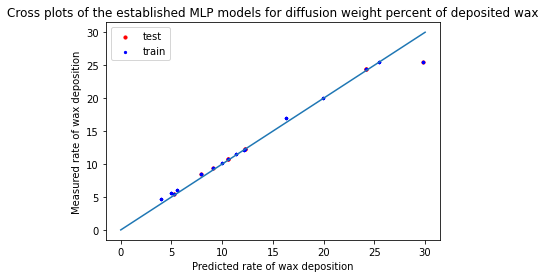

In [50]:
import matplotlib.pyplot as plt
x_line = np.linspace(0, 30, 100)
y_line = np.linspace(0, 30, 100)
# Plot the arrays
plt.scatter(y_test, grid_predictions_mlp,color = 'red', s=10, label = 'test')
plt.scatter(y_train, grid_pred_train_mlp,color = 'blue', s=5, label = 'train')
plt.plot(x_line,y_line)

# Add labels and title
plt.xlabel("Predicted rate of wax deposition")
plt.ylabel("Measured rate of wax deposition")
plt.title("Cross plots of the established MLP models for diffusion weight percent of deposited wax")
plt.legend()
# Show the plot
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

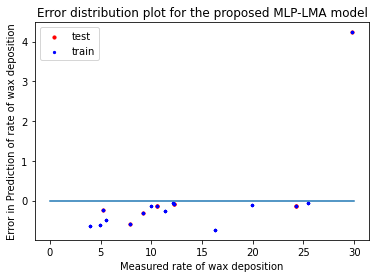

In [53]:
error = []
i=0
error = y_test-grid_predictions_mlp
plt.scatter(y_test, error, color='red', s=10, label = 'test')
error_pred = y_train-grid_pred_train_mlp
plt.scatter(y_train, error_pred, color = 'blue', s=5, label = 'train')
x = [0,30]
y_1 = [0,0]
plt.plot(x,y_1)
plt.ylabel("Error in Prediction of rate of wax deposition")
plt.xlabel("Measured rate of wax deposition")
plt.title("Error distribution plot for the proposed MLP-LMA model")
plt.legend()
plt.plot


In [54]:
import sys
!{sys.executable} -m pip install scikit-optimize

In [55]:
MLPRegressor().get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

### Model 02 - SVM

In [56]:
from sklearn.svm import SVR

In [58]:
param_grid = {
    'C': [0.001,0.01,0.1,1],
    'gamma': [0.01,0.001,0.0001],
    'kernel': ['linear', 'rbf'],
    'degree' : [3,4,6]
}

svr = SVR(kernel ='rbf')

grid_svm = GridSearchCV(svr, param_grid, refit = True, cv=5, scoring='neg_mean_squared_error', verbose = 3)

#fitting the model for grid search
grid_svm.fit(X_train,y_train)
print("best parameters are:", grid_svm.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.001, degree=3, gamma=0.01, kernel=linear;, score=-29.406 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, gamma=0.01, kernel=linear;, score=-34.581 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, gamma=0.01, kernel=linear;, score=-35.365 total time=   0.0s
[CV 4/5] END C=0.001, degree=3, gamma=0.01, kernel=linear;, score=-39.661 total time=   0.0s
[CV 5/5] END C=0.001, degree=3, gamma=0.01, kernel=linear;, score=-51.288 total time=   0.0s
[CV 1/5] END C=0.001, degree=3, gamma=0.01, kernel=rbf;, score=-69.521 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, gamma=0.01, kernel=rbf;, score=-62.385 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, gamma=0.01, kernel=rbf;, score=-48.174 total time=   0.0s
[CV 4/5] END C=0.001, degree=3, gamma=0.01, kernel=rbf;, score=-63.463 total time=   0.0s
[CV 5/5] END C=0.001, degree=3, gamma=0.01, kernel=rbf;, score=-56.982 total time=   0.0s
[CV 1/5] END C=0.001, d

[CV 1/5] END C=0.01, degree=3, gamma=0.01, kernel=rbf;, score=-69.071 total time=   0.0s
[CV 2/5] END C=0.01, degree=3, gamma=0.01, kernel=rbf;, score=-62.057 total time=   0.0s
[CV 3/5] END C=0.01, degree=3, gamma=0.01, kernel=rbf;, score=-47.862 total time=   0.0s
[CV 4/5] END C=0.01, degree=3, gamma=0.01, kernel=rbf;, score=-63.155 total time=   0.0s
[CV 5/5] END C=0.01, degree=3, gamma=0.01, kernel=rbf;, score=-56.594 total time=   0.0s
[CV 1/5] END C=0.01, degree=3, gamma=0.001, kernel=linear;, score=-6.226 total time=   0.0s
[CV 2/5] END C=0.01, degree=3, gamma=0.001, kernel=linear;, score=-27.589 total time=   0.0s
[CV 3/5] END C=0.01, degree=3, gamma=0.001, kernel=linear;, score=-18.230 total time=   0.0s
[CV 4/5] END C=0.01, degree=3, gamma=0.001, kernel=linear;, score=-4.343 total time=   0.0s
[CV 5/5] END C=0.01, degree=3, gamma=0.001, kernel=linear;, score=-38.882 total time=   0.0s
[CV 1/5] END C=0.01, degree=3, gamma=0.001, kernel=rbf;, score=-68.949 total time=   0.0s
[C

[CV 1/5] END C=0.1, degree=3, gamma=0.001, kernel=linear;, score=-5.506 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.001, kernel=linear;, score=-24.911 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.001, kernel=linear;, score=-15.525 total time=   0.4s
[CV 4/5] END C=0.1, degree=3, gamma=0.001, kernel=linear;, score=-3.100 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.001, kernel=linear;, score=-36.977 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf;, score=-64.515 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf;, score=-56.144 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf;, score=-45.718 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf;, score=-59.225 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf;, score=-51.099 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.0001, kernel=linear;, score=-5.506 total time=   0.0s
[CV 2

[CV 2/5] END C=1, degree=3, gamma=0.001, kernel=linear;, score=-25.372 total time=   4.0s
[CV 3/5] END C=1, degree=3, gamma=0.001, kernel=linear;, score=-14.067 total time=   1.1s
[CV 4/5] END C=1, degree=3, gamma=0.001, kernel=linear;, score=-2.409 total time=   0.5s
[CV 5/5] END C=1, degree=3, gamma=0.001, kernel=linear;, score=-37.738 total time=   2.4s
[CV 1/5] END C=1, degree=3, gamma=0.001, kernel=rbf;, score=-47.874 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.001, kernel=rbf;, score=-38.012 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.001, kernel=rbf;, score=-28.815 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.001, kernel=rbf;, score=-40.216 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.001, kernel=rbf;, score=-37.952 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.0001, kernel=linear;, score=-4.534 total time=   1.0s
[CV 2/5] END C=1, degree=3, gamma=0.0001, kernel=linear;, score=-25.372 total time=   3.8s
[CV 3/5] END C=1, degree=

In [59]:
grid_predictions_svm = grid_svm.predict(X_test)
grid_pred_train_svm = grid_svm.predict(X_train)
grid_pred_all_svm = grid_svm.predict(X)

In [60]:
from sklearn.metrics import r2_score
print('R2 score: Test', r2_score(y_test, grid_predictions_svm))
print('R2 score: Train', r2_score(y_train, grid_pred_train_svm))
print('R2 score: Train', r2_score(y, grid_pred_all_svm))

R2 score: Test 0.8913006676314306
R2 score: Train 0.7080083449082644
R2 score: Train 0.7314216091903254


In [61]:
from sklearn.metrics import mean_squared_error
print('RMSE: Test', mean_squared_error(y_test, grid_predictions_svm))
print('RMSE: Train', mean_squared_error(y_train, grid_pred_train_svm))
print('RMSE: All Data', mean_squared_error(y, grid_pred_all_svm))

RMSE: Test 6.755326647475577
RMSE: Train 16.563406715416967
RMSE: All Data 15.497311055858125


In [62]:
from sklearn.inspection import permutation_importance
#permutation importance
results = permutation_importance(grid_svm, X_train, y_train, scoring = 'neg_mean_squared_error')

#get feature importance
importance = results.importances_mean

In [63]:
list_features = ['Oil Temperature','Wall Temperature','Rotation Speed','Wall Shear Stress','Oil Viscosity','Wax Crystal Solubility Coefficient','Temperature Gradient']
#summarize feature importance 
j=0
for i,v in enumerate(importance):
    print(list_features[j],'Feature: %0d, Score: %.5f' %(i,v))
    j+=1

Oil Temperature Feature: 0, Score: 99.33953
Wall Temperature Feature: 1, Score: 14.40129
Rotation Speed Feature: 2, Score: 35.66748
Wall Shear Stress Feature: 3, Score: 18.60531
Oil Viscosity Feature: 4, Score: -0.05253
Wax Crystal Solubility Coefficient Feature: 5, Score: 25.93696
Temperature Gradient Feature: 6, Score: 0.17615


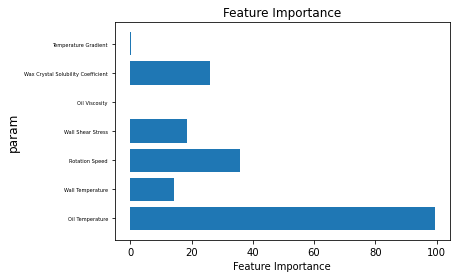

In [64]:
plt.barh(list_features, importance)

# setting label of y-axis 
# setting label of x-axis
plt.xlabel("Feature Importance")
plt.ylabel('param', fontsize = 12)
plt.yticks(fontsize = 5)
plt.title("Feature Importance")
plt.show()

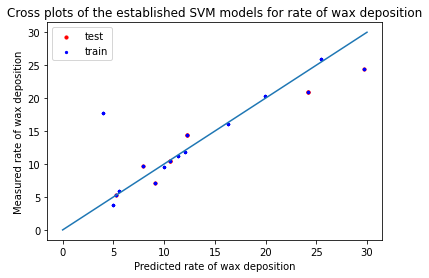

In [65]:
import matplotlib.pyplot as plt
x_line = np.linspace(0, 30, 100)
y_line = np.linspace(0, 30, 100)
# Plot the arrays
plt.scatter(y_test, grid_predictions_svm,color = 'red', s=10, label = 'test')
plt.scatter(y_train, grid_pred_train_svm,color = 'blue', s=5, label = 'train')
plt.plot(x_line,y_line)

# Add labels and title
plt.xlabel("Predicted rate of wax deposition")
plt.ylabel("Measured rate of wax deposition")
plt.title("Cross plots of the established SVM models for rate of wax deposition")
plt.legend()
# Show the plot
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

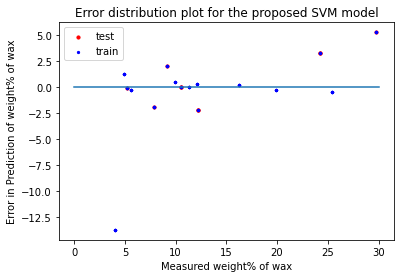

In [67]:
error = []
i=0
error = y_test-grid_predictions_svm
plt.scatter(y_test, error, color='red', s=10, label = 'test')
error_pred = y_train-grid_pred_train_svm
plt.scatter(y_train, error_pred, color = 'blue', s=5, label = 'train')
x = [0,30]
y_1 = [0,0]
plt.plot(x,y_1)
plt.ylabel("Error in Prediction of weight% of wax")
plt.xlabel("Measured weight% of wax")
plt.title("Error distribution plot for the proposed SVM model")
plt.legend()
plt.plot


### Model - 03 XGBoost

In [68]:
import xgboost as xgb
import sklearn
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001,0.01,0.1,0.3,1], 'n_estimators': [10,100,1000,10000,100000]
}

# Create the XGBoost model object
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
print("done grid search")
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

done grid search
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best set of hyperparameters:  {'learning_rate': 1, 'n_estimators': 100}
Best score:  -0.004428543887179553


In [69]:
feature_importance_weight = grid_search.best_estimator_.get_booster().get_score(importance_type='weight')

In [70]:
grid_search.best_estimator_.get_booster().get_score(importance_type='weight')

{'Oil Temperature': 30.0,
 'Wall Temperature': 4.0,
 'Rotation Speed': 10.0,
 'Wall Shear Stress': 15.0,
 'Oil Viscosity': 3.0,
 'Wax Crystal Solubility Coefficient': 4.0,
 'Temperature Gradient': 4.0}

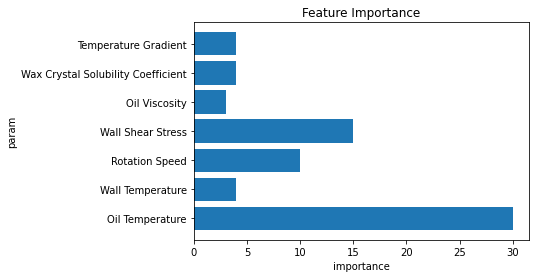

In [90]:
y_feature=list(feature_importance_weight.keys())
 
# getting values against each value of y
x_feature=list(feature_importance_weight.values())
plt.barh(y_feature, x_feature)
# setting label of y-axis
plt.ylabel("Parameters")
plt.yticks(fontsize = 10) 
# setting label of x-axis
plt.xlabel("importance")
plt.title("Feature Importance")
plt.show()

In [72]:
import xgboost as xgb

In [73]:
grid_predictions_xgb = grid_search.predict(X_test)
grid_pred_train_xgb = grid_search.predict(X_train)
grid_pred_all_xgb = grid_search.predict(X)

In [74]:
from sklearn.metrics import r2_score
print('R2 score: Test', r2_score(y_test, grid_predictions_xgb))
print('R2 score: Train', r2_score(y_train, grid_pred_train_xgb))
print('R2 score: Train', r2_score(y, grid_pred_all_xgb))

R2 score: Test 0.999999998994576
R2 score: Train 0.9999999990779043
R2 score: Train 0.9999999990743234


In [75]:
from sklearn.metrics import mean_squared_error
print('RMSE: Test', mean_squared_error(y_test, grid_predictions_xgb))
print('RMSE: Train', mean_squared_error(y_train, grid_pred_train_xgb))
print('RMSE: All Data', mean_squared_error(y, grid_pred_all_xgb))

RMSE: Test 6.248398472976498e-08
RMSE: Train 5.230645094750901e-08
RMSE: All Data 5.3412704619493357e-08


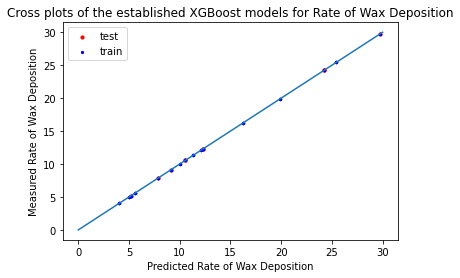

In [76]:
import matplotlib.pyplot as plt
x_line = np.linspace(0, 30, 100)
y_line = np.linspace(0, 30, 100)
# Plot the arrays
plt.scatter(y_test, grid_predictions_xgb,color = 'red', s=10, label = 'test')
plt.scatter(y_train, grid_pred_train_xgb,color = 'blue', s=5, label = 'train')
plt.plot(x_line,y_line)

# Add labels and title
plt.xlabel("Predicted Rate of Wax Deposition")
plt.ylabel("Measured Rate of Wax Deposition")
plt.title("Cross plots of the established XGBoost models for Rate of Wax Deposition")
plt.legend()
# Show the plot
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

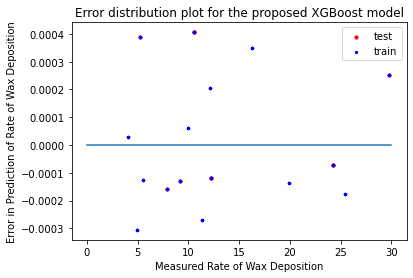

In [77]:
error = []
i=0
error = y_test-grid_predictions_xgb
plt.scatter(y_test, error, color='red', s=10, label = 'test')
error_pred = y_train-grid_pred_train_xgb
plt.scatter(y_train, error_pred, color = 'blue', s=5, label = 'train')
x = [0,30]
y_1 = [0,0]
plt.plot(x,y_1)
plt.ylabel("Error in Prediction of Rate of Wax Deposition")
plt.xlabel("Measured Rate of Wax Deposition")
plt.title("Error distribution plot for the proposed XGBoost model")
plt.legend()
plt.plot


### Model - 04 LightGBM

In [78]:
import sys
!{sys.executable} -m pip install lightGBM

In [79]:
import lightgbm as lgb

In [80]:
hyperparameter_grid = {
    'num_leaves': [31, 63, 127],
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0],
}

In [81]:
lgb_model = lgb.LGBMRegressor()

# Create a GridSearchCV object
grid_search_lgbm = GridSearchCV(lgb_model, hyperparameter_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model
grid_search_lgbm.fit(X_train, y_train)

# Get the best model
best_model = grid_search_lgbm.best_estimator_



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 82, number of used features: 6
[LightGBM] [Info] Start training from score 12.605976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [82]:
grid_predictions_lgbm = best_model.predict(X_test)
grid_pred_train_lgbm = best_model.predict(X_train)
grid_pred_all_lgbm = best_model.predict(X)

In [83]:
from sklearn.metrics import r2_score
print('R2 score: Test', r2_score(y_test, grid_predictions_lgbm))
print('R2 score: Train', r2_score(y_train, grid_pred_train_lgbm))
print('R2 score: Train', r2_score(y, grid_pred_all_lgbm))

R2 score: Test 0.9273935107582577
R2 score: Train 0.9397117086924786
R2 score: Train 0.9386733090843975


In [84]:
from sklearn.metrics import mean_squared_error
print('RMSE: Test', mean_squared_error(y_test, grid_predictions_lgbm))
print('RMSE: Train', mean_squared_error(y_train, grid_pred_train_lgbm))
print('RMSE: All Data', mean_squared_error(y, grid_pred_all_lgbm))

RMSE: Test 4.51226829886412
RMSE: Train 3.419890506084121
RMSE: All Data 3.538627222690642


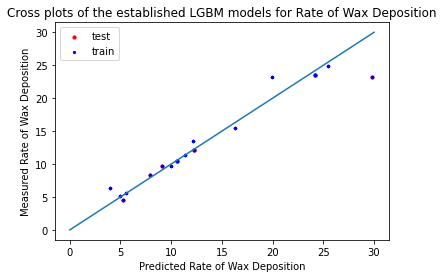

In [87]:
import matplotlib.pyplot as plt
x_line = np.linspace(0, 30, 100)
y_line = np.linspace(0, 30, 100)
# Plot the arrays
plt.scatter(y_test, grid_predictions_lgbm,color = 'red', s=10, label = 'test')
plt.scatter(y_train, grid_pred_train_lgbm,color = 'blue', s=5, label = 'train')
plt.plot(x_line,y_line)

# Add labels and title
plt.xlabel("Predicted Rate of Wax Deposition")
plt.ylabel("Measured Rate of Wax Deposition")
plt.title("Cross plots of the established LGBM models for Rate of Wax Deposition")
plt.legend()
# Show the plot
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

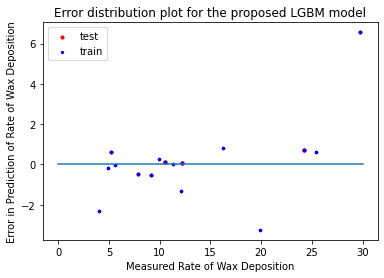

In [88]:
error = []
i=0
error = y_test-grid_predictions_lgbm
plt.scatter(y_test, error, color='red', s=10, label = 'test')
error_pred = y_train-grid_pred_train_lgbm
plt.scatter(y_train, error_pred, color = 'blue', s=5, label = 'train')
x = [0,30]
y_1 = [0,0]
plt.plot(x,y_1)
plt.ylabel("Error in Prediction of Rate of Wax Deposition")
plt.xlabel("Measured Rate of Wax Deposition")
plt.title("Error distribution plot for the proposed LGBM model")
plt.legend()
plt.plot

### Pairplots

In [91]:
import seaborn as sns

In [98]:
df_b = df.iloc[:,5:]

In [99]:
df_b

,Oil Temperature,Wall Temperature,Rotation Speed,Wall Shear Stress,Oil Viscosity,Wax Crystal Solubility Coefficient,Temperature Gradient,Wax Deposition Rate
0,42.0,32.0,150.0,3.58,0.21,17.70,579.0,9.14
1,45.0,35.0,150.0,2.72,0.13,6.07,578.8,4.96
2,48.0,38.0,150.0,2.25,0.09,3.47,578.9,5.56
3,51.0,41.0,150.0,1.89,0.07,3.88,576.8,7.89
4,55.0,45.0,150.0,1.51,0.05,5.93,574.3,16.26
...,...,...,...,...,...,...,...,...
87,47.0,32.0,150.0,2.85,0.22,17.70,867.6,10.55
88,52.0,32.0,150.0,2.33,0.23,17.70,1152.0,12.25
89,50.0,45.0,150.0,1.76,0.05,5.93,288.4,11.33
90,60.0,45.0,150.0,1.32,0.05,5.93,859.3,24.22


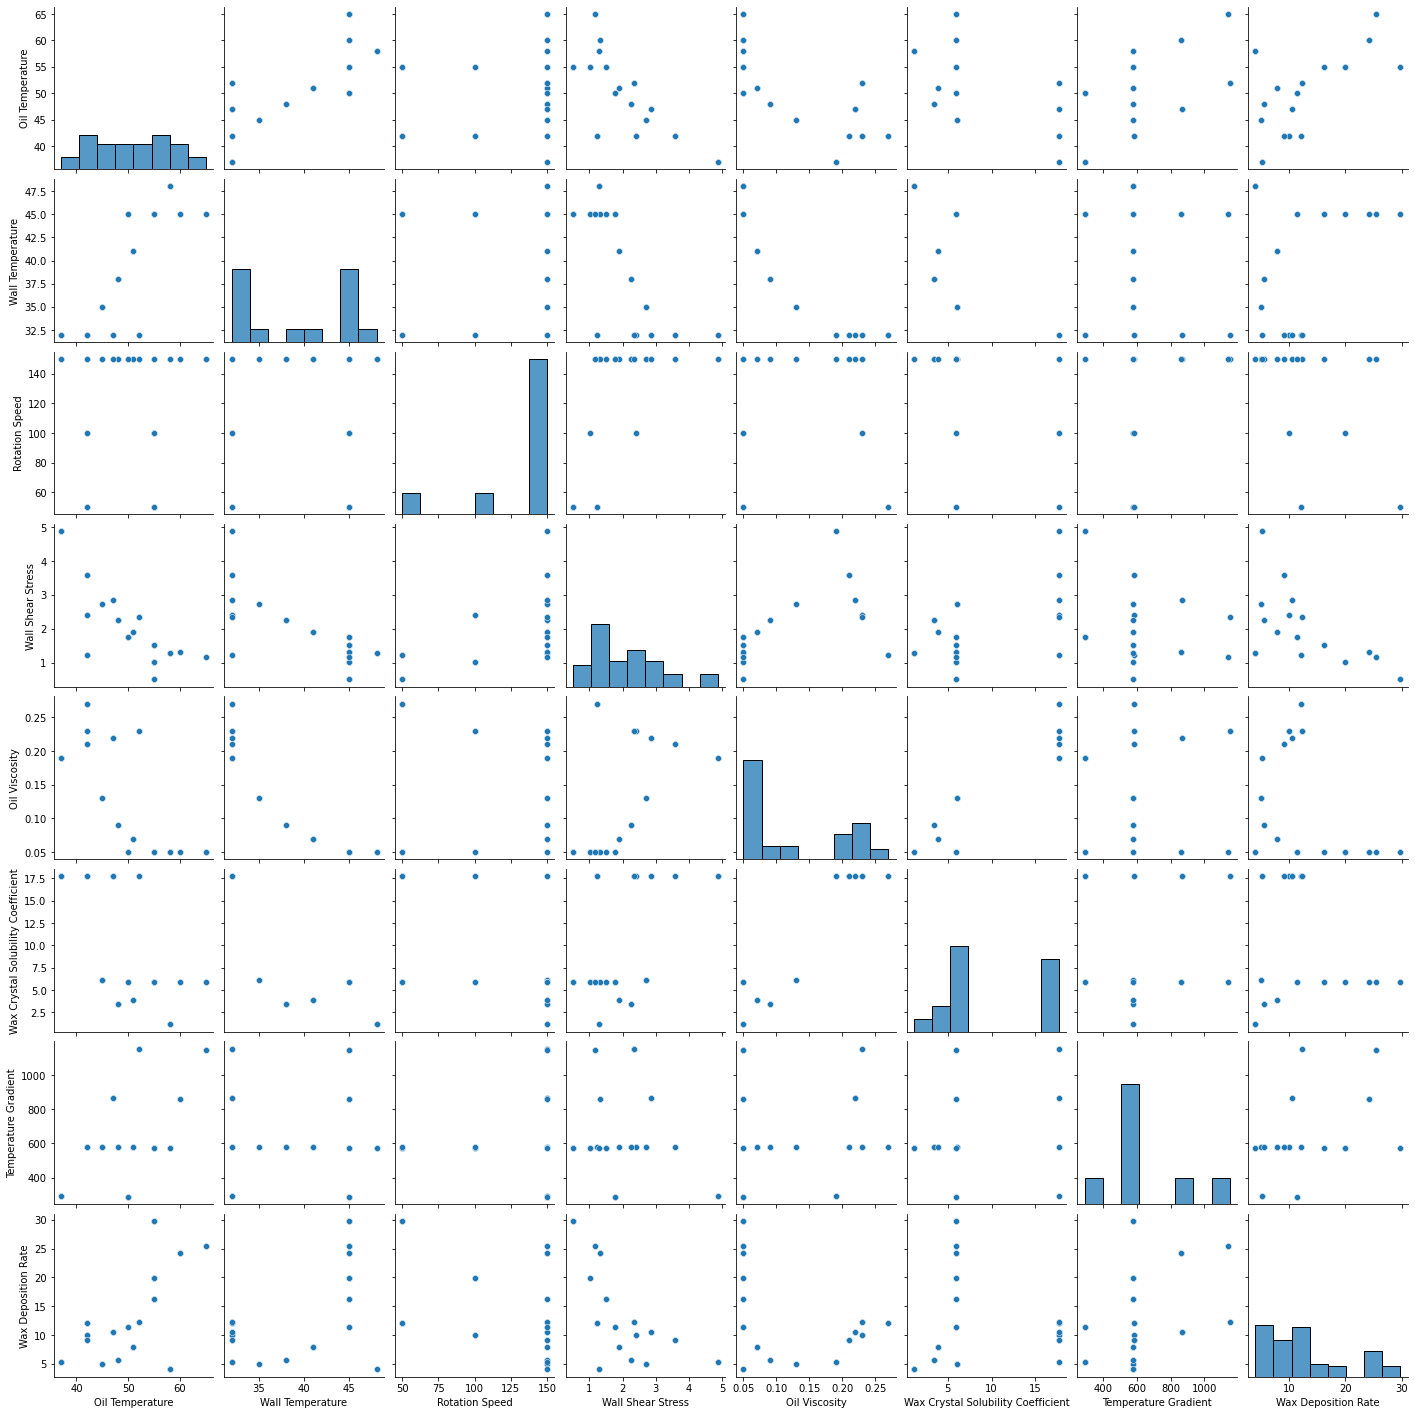

In [100]:
sns.pairplot(df_b)

In [102]:
df_b.describe()

,Oil Temperature,Wall Temperature,Rotation Speed,Wall Shear Stress,Oil Viscosity,Wax Crystal Solubility Coefficient,Temperature Gradient,Wax Deposition Rate
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,50.326087,39.021739,133.695652,2.075978,0.123261,9.683043,651.213043,12.823043
std,7.427464,6.203470,33.239636,1.069503,0.081174,6.301056,243.000343,7.637757
min,37.000000,32.000000,50.000000,0.500000,0.050000,1.150000,288.400000,4.010000
25%,45.000000,32.000000,150.000000,1.290000,0.050000,5.930000,574.300000,5.560000
50%,50.500000,39.500000,150.000000,1.890000,0.080000,5.930000,578.850000,10.550000
75%,55.000000,45.000000,150.000000,2.720000,0.210000,17.700000,859.300000,16.260000
max,65.000000,48.000000,150.000000,4.870000,0.270000,17.700000,1152.000000,29.750000
